# Analyze Results from Evaluation Quickstart

This notebook analyzes the results of the evaluation quickstart.

## Setup

First, we need to import our libraries:

In [1]:
import pandas as pd
import matplotlib

In [2]:
%matplotlib inline

## Data Import and Preparation

LensKit puts its output in a `csv` file:

In [4]:
results = pd.read_csv('build/eval-results.csv')
results.head()

,Partition,Algorithm,BuildTime,TestTime,RMSE.ByUser,RMSE.ByRating,Predict.nDCG,MRR
0,5,Custom,0.508,1.857,0.923840,0.965181,0.952336,0.030545
1,5,PersMean,0.521,2.343,0.923840,0.965181,0.952336,0.030848
2,4,Custom,0.084,0.552,0.956727,0.979272,0.947415,0.032206
3,4,PersMean,0.085,1.522,0.956727,0.979272,0.947415,0.032357
4,3,PersMean,0.083,1.488,0.915944,0.925657,0.950215,0.030720


We ran each algorithm 5 times since we used 5-fold cross-validation.  What we want to do next is compute the average value of each metric for each data set.

In [5]:
agg_results = results.drop(['Partition'], axis=1).groupby('Algorithm').mean()
agg_results

,BuildTime,TestTime,RMSE.ByUser,RMSE.ByRating,Predict.nDCG,MRR
Algorithm,,,,,,
Custom,0.1758,0.9024,0.924559,0.948341,0.950252,0.031540
ItemItem,6.6352,16.4142,0.890838,0.907916,0.955412,0.110510
PersMean,0.1592,1.7750,0.924559,0.948341,0.950252,0.031666


## Plotting Results

Let's start plotting things. What's the RMSE achieved by each algorithm?

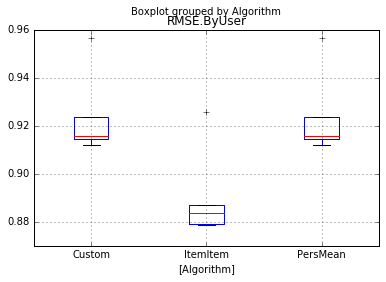

In [6]:
results.loc[:,['Algorithm', 'RMSE.ByUser']].boxplot(by='Algorithm')

Next up: nDCG

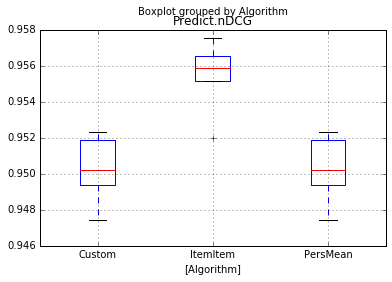

In [9]:
results.loc[:,['Algorithm', 'Predict.nDCG']].boxplot(by='Algorithm')

Finally, the build and test times.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D15E20C4E0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001D15E4500B8>], dtype=object)

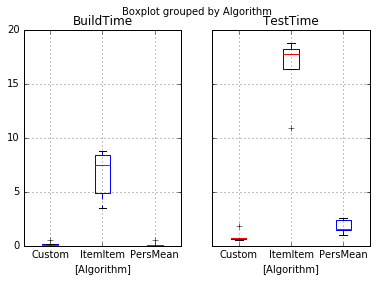

In [10]:
results.loc[:,['Algorithm', 'BuildTime', 'TestTime']].boxplot(by='Algorithm')